In [1]:
#Importing the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Reading the overall train dataset
data = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/Sameek/0. University of North Texas/UNT Masters Course/Semester 1 - Fall 2024/CSCE 5214 - Software Development for AI/Project 1/spaceship-titanic/train.csv')

#Displaying the first 5 rows of the overall train dataset
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#Getting the datatypes of the dataset
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:

data_TotalExpenses = data[['RoomService', 'FoodCourt','ShoppingMall','Spa']]

# Calculate sum of each row and create 'sum' column
data_TotalExpenses['Total Expenses'] = data_TotalExpenses.sum(axis=1)

# Create 'Total Expenses' column in the original DataFrame
data['Total Expenses'] = data_TotalExpenses['Total Expenses']

data_updated = data[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'Transported', 'Total Expenses']]

# Splitting the 'Cabin' column
data_updated[['Deck','Num', 'Side']] = data_updated['Cabin'].str.split('/', expand=True)

# Selecting the desired columns for the final data_updated DataFrame
data_updated = data_updated[['PassengerId', 'HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP', 'Total Expenses','Transported']]
data_updated

C:\Users\bhatt\AppData\Local\Temp\ipykernel_28344\3318559525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_TotalExpenses['Total Expenses'] = data_TotalExpenses.sum(axis=1)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_28344\3318559525.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated[['Deck','Num', 'Side']] = data_updated['Cabin'].str.split('/', expand=True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_28344\3318559525.py:12: SettingWithCopyWarning: 
A value is trying to be set on a 

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,Total Expenses,Transported
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,False
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,692.0,True
2,0003_01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,10334.0,False
3,0003_02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,4983.0,False
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,1089.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,98,P,55 Cancri e,41.0,True,8462.0,False
8689,9278_01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,False
8690,9279_01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,1873.0,True
8691,9280_01,Europa,False,E,608,S,55 Cancri e,32.0,False,1402.0,False


In [5]:
#print the number of missing values in each column
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep         217
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP               203
Total Expenses      0
Transported         0
dtype: int64


In [6]:
data_updated.loc[(data_updated['Total Expenses'] == 0) & (data_updated['CryoSleep'].isnull()), 'CryoSleep'] = True

In [7]:
data_updated.loc[(data_updated['Total Expenses'] != 0) & (data_updated['CryoSleep'].isnull()), 'CryoSleep'] = False

In [8]:
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP               203
Total Expenses      0
Transported         0
dtype: int64


In [9]:
print(data_updated[(data_updated['Age'] < 18) & (data_updated['VIP'] == True)].shape[0])

0


In [10]:
data_updated.loc[(data_updated['Age'] < 18) & (data_updated['VIP'].isnull()), 'VIP'] = False

In [11]:
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP               158
Total Expenses      0
Transported         0
dtype: int64


In [12]:
print(data_updated[(data_updated['HomePlanet'] == 'Earth') & (data_updated['VIP'] == True)].shape[0])

0


In [13]:
data_updated.loc[(data_updated['HomePlanet'] == 'Earth') & (data_updated['VIP'].isnull()), 'VIP'] = False

In [14]:
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP                76
Total Expenses      0
Transported         0
dtype: int64


## Handling the missing values in 'HomePlanet'

In [15]:
data_updated[['Group','Person']] = data_updated['PassengerId'].str.split('_', expand=True)
data_updated['PassengerId'] = data['PassengerId']
data_updated = data_updated[['PassengerId', 'Group', 'HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP', 'Total Expenses','Transported']]

In [16]:
data_updated.loc[:, 'HomePlanet'] = data_updated.groupby('Group')['HomePlanet'].ffill()
data_updated.loc[:, 'HomePlanet'] = data_updated.groupby('Group')['HomePlanet'].bfill()

C:\Users\bhatt\AppData\Local\Temp\ipykernel_28344\3583414770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated.loc[:, 'HomePlanet'] = data_updated.groupby('Group')['HomePlanet'].ffill()
C:\Users\bhatt\AppData\Local\Temp\ipykernel_28344\3583414770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated.loc[:, 'HomePlanet'] = data_updated.groupby('Group')['HomePlanet'].bfill()


In [17]:
print(data_updated.isnull().sum())
#there are still a few missing values in HomePlanet because some groups have only one person each

PassengerId         0
Group               0
HomePlanet        111
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP                76
Total Expenses      0
Transported         0
dtype: int64


In [18]:
data_updated.loc[data_updated['Deck'].isin(['A', 'B', 'C', 'T']) & data_updated['HomePlanet'].isnull(), 'HomePlanet'] = 'Europa'

In [19]:
print(data_updated.isnull().sum())

PassengerId         0
Group               0
HomePlanet        104
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP                76
Total Expenses      0
Transported         0
dtype: int64


In [20]:
data_updated.loc[(data_updated['Deck'] == 'D') & data_updated['HomePlanet'].isnull(), 'HomePlanet'] = 'Mars'

In [21]:
print(data_updated.isnull().sum())

PassengerId         0
Group               0
HomePlanet        100
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP                76
Total Expenses      0
Transported         0
dtype: int64


In [22]:
# Create a copy of the DataFrame to avoid modifying the original
data_imputed = data_updated.copy()

# Select relevant columns for KNN imputation (numerical and categorical)
features = ['HomePlanet','Age', 'Deck', 'Num', 'Side', 'Destination', 'VIP']
data_subset = data_imputed[features]

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_subset, columns=['HomePlanet', 'Deck', 'Side', 'Destination', 'VIP'], dummy_na=False) #dummy_na=False will ignore nan values during one-hot encoding

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed_array = imputer.fit_transform(data_encoded)

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed_array, columns=data_encoded.columns)

# Reverse one-hot encoding to get categorical features back
categorical_features = ['HomePlanet', 'Deck', 'Side', 'Destination', 'VIP']
for feature in categorical_features:
    #Get a list of columns related to the feature
    feature_cols = [col for col in data_imputed.columns if feature in col]

    #Find the column with the maximum value for each row and extract the category name
    data_imputed[feature] = data_imputed[feature_cols].idxmax(axis=1).str.replace(f'{feature}_', '')

    #Remove the one-hot encoded columns for the current feature
    data_imputed = data_imputed.drop(feature_cols, axis=1)

# Update the original DataFrame with imputed values
for feature in features:
    data_updated[feature] = data_imputed[feature]

print(data_updated.isnull().sum())

PassengerId       0
Group             0
HomePlanet        0
CryoSleep         0
Deck              0
Num               0
Side              0
Destination       0
Age               0
VIP               0
Total Expenses    0
Transported       0
dtype: int64


C:\Users\bhatt\AppData\Local\Temp\ipykernel_28344\474121349.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated[feature] = data_imputed[feature]


In [23]:
data_updated = data_updated[['PassengerId', 'HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP', 'Total Expenses','Transported']]

In [24]:
data_updated.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,Total Expenses,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,692.0,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,10334.0,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,4983.0,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,1089.0,True


In [25]:
# Target Encoding: This enconding is used when the relationship between 
#categories and the target variable is considerable and cannot be ignored.
import category_encoders as ce

# Used target encoding on the columns HomePlanet, Destination, Deck, CryoSleep, Side
target_encoder = ce.TargetEncoder(cols=['HomePlanet', 'Destination', 'Deck', 'CryoSleep', 'Side'])

In [26]:
# Transforming the encoded columns as per the target column
data_encoded = target_encoder.fit_transform(data_updated[['HomePlanet', 'Destination', 'Deck', 'CryoSleep', 'Side']], data_updated['Transported'])

In [27]:
print(data_encoded)

      HomePlanet  Destination      Deck  CryoSleep      Side
0       0.660055     0.471175  0.734275   0.328176  0.453575
1       0.424588     0.471175  0.439871   0.328176  0.555037
2       0.660055     0.471175  0.498901   0.328176  0.555037
3       0.660055     0.471175  0.498901   0.328176  0.555037
4       0.424588     0.471175  0.439871   0.328176  0.555037
...          ...          ...       ...        ...       ...
8688    0.660055     0.600404  0.498901   0.328176  0.453575
8689    0.424588     0.503769  0.516217   0.814673  0.555037
8690    0.424588     0.471175  0.516217   0.328176  0.555037
8691    0.660055     0.600404  0.357306   0.328176  0.555037
8692    0.660055     0.471175  0.357306   0.328176  0.555037

[8693 rows x 5 columns]


In [28]:
# Replacing the encoded values of the respective columns in the original dataset
data_updated['HomePlanet'] = data_encoded['HomePlanet']
data_updated['Destination'] = data_encoded['Destination']
data_updated['Deck'] = data_encoded['Deck']
data_updated['CryoSleep'] = data_encoded['CryoSleep']
data_updated['Side'] = data_encoded['Side']

In [29]:
print(data_updated)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.660055   0.328176  0.734275     0.0  0.453575   
1        0002_01    0.424588   0.328176  0.439871     0.0  0.555037   
2        0003_01    0.660055   0.328176  0.498901     0.0  0.555037   
3        0003_02    0.660055   0.328176  0.498901     0.0  0.555037   
4        0004_01    0.424588   0.328176  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.660055   0.328176  0.498901    98.0  0.453575   
8689     9278_01    0.424588   0.814673  0.516217  1499.0  0.555037   
8690     9279_01    0.424588   0.328176  0.516217  1500.0  0.555037   
8691     9280_01    0.660055   0.328176  0.357306   608.0  0.555037   
8692     9280_02    0.660055   0.328176  0.357306   608.0  0.555037   

      Destination   Age    VIP  Total Expenses  Transported  
0        0.471175  39.0  False             0.0        False  
1        0.471175  24.0

In [30]:
print(data_updated['VIP'].dtype)

object


In [31]:
# For the column VIP, replaced the False value with 0 and True value with 1
data_updated['VIP'] = data_updated['VIP'].replace({'True': 1, 'False': 0})
print(data_updated)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.660055   0.328176  0.734275     0.0  0.453575   
1        0002_01    0.424588   0.328176  0.439871     0.0  0.555037   
2        0003_01    0.660055   0.328176  0.498901     0.0  0.555037   
3        0003_02    0.660055   0.328176  0.498901     0.0  0.555037   
4        0004_01    0.424588   0.328176  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.660055   0.328176  0.498901    98.0  0.453575   
8689     9278_01    0.424588   0.814673  0.516217  1499.0  0.555037   
8690     9279_01    0.424588   0.328176  0.516217  1500.0  0.555037   
8691     9280_01    0.660055   0.328176  0.357306   608.0  0.555037   
8692     9280_02    0.660055   0.328176  0.357306   608.0  0.555037   

      Destination   Age  VIP  Total Expenses  Transported  
0        0.471175  39.0    0             0.0        False  
1        0.471175  24.0    

In [32]:
# Splitting and storing the taget column and the sample columns
X = data_updated[['PassengerId','HomePlanet','CryoSleep','Deck','Num','Side','Destination','Age','VIP','Total Expenses']]
y = data_updated[['Transported']]

In [33]:
print(X)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.660055   0.328176  0.734275     0.0  0.453575   
1        0002_01    0.424588   0.328176  0.439871     0.0  0.555037   
2        0003_01    0.660055   0.328176  0.498901     0.0  0.555037   
3        0003_02    0.660055   0.328176  0.498901     0.0  0.555037   
4        0004_01    0.424588   0.328176  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.660055   0.328176  0.498901    98.0  0.453575   
8689     9278_01    0.424588   0.814673  0.516217  1499.0  0.555037   
8690     9279_01    0.424588   0.328176  0.516217  1500.0  0.555037   
8691     9280_01    0.660055   0.328176  0.357306   608.0  0.555037   
8692     9280_02    0.660055   0.328176  0.357306   608.0  0.555037   

      Destination   Age  VIP  Total Expenses  
0        0.471175  39.0    0             0.0  
1        0.471175  24.0    0           692.0  
2     

In [34]:
print(y)

      Transported
0           False
1            True
2           False
3           False
4            True
...           ...
8688        False
8689        False
8690         True
8691        False
8692         True

[8693 rows x 1 columns]


In [35]:
# Splitting the training and validation set in 80:20 ratio
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
print(X_train)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
5458     5819_01    0.660055   0.814673  0.734275   221.0  0.555037   
7040     7498_03    0.523171   0.328176  0.439871  1550.0  0.453575   
3066     3309_01    0.424588   0.328176  0.516217   539.0  0.453575   
7180     7667_01    0.660055   0.814673  0.734275   251.0  0.453575   
8161     8727_01    0.424588   0.328176  0.439871  1797.0  0.453575   
...          ...         ...        ...       ...     ...       ...   
6141     6480_01    0.424588   0.328176  0.357306   433.0  0.555037   
2828     3053_01    0.660055   0.328176  0.498901   180.6  0.453575   
5820     6158_01    0.424588   0.814673  0.516217   996.0  0.555037   
5465     5826_01    0.424588   0.814673  0.357306   367.0  0.453575   
8132     8687_01    0.424588   0.328176  0.439871  1680.0  0.555037   

      Destination   Age  VIP  Total Expenses  
5458     0.471175  29.0    0             0.0  
7040     0.471175  27.0    1           940.0  
3066  

In [37]:
print(y_train)

      Transported
5458         True
7040         True
3066        False
7180         True
8161        False
...           ...
6141        False
2828        False
5820         True
5465         True
8132         True

[6954 rows x 1 columns]


In [38]:
print(X_test)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
232      0248_01    0.660055   0.328176  0.680054    10.0  0.555037   
442      0474_01    0.424588   0.814673  0.516217    69.0  0.555037   
1254     1326_02    0.523171   0.328176  0.439871   257.0  0.555037   
6948     7374_01    0.523171   0.814673  0.439871  1527.0  0.453575   
763      0802_01    0.523171   0.814673  0.439871   148.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
6991     7435_01    0.660055   0.814673  0.734275   244.0  0.453575   
7924     8460_01    0.424588   0.328176  0.439871  1628.0  0.555037   
1597     1695_01    0.424588   0.328176  0.516217   264.0  0.555037   
4479     4763_01    0.523171   0.328176  0.439871   969.0  0.453575   
993      1056_01    0.523171   0.814673  0.439871   218.0  0.453575   

      Destination   Age  VIP  Total Expenses  
232      0.471175  33.0    0          8621.0  
442      0.600404  15.0    0             0.0  
1254  

In [39]:
print(y_test)

      Transported
232         False
442          True
1254        False
6948         True
763          True
...           ...
6991         True
7924        False
1597        False
4479         True
993          True

[1739 rows x 1 columns]


In [40]:
# Initializing the Logisitc Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [43]:
print(f'Accuracy : {accuracy:.4f}')
print('Confusion Matrix :')
print(conf_matrix)
print('Classification Report :')
print(class_report)

Accuracy : 0.5796
Confusion Matrix :
[[532 364]
 [367 476]]
Classification Report :
              precision    recall  f1-score   support

       False       0.59      0.59      0.59       896
        True       0.57      0.56      0.57       843

    accuracy                           0.58      1739
   macro avg       0.58      0.58      0.58      1739
weighted avg       0.58      0.58      0.58      1739



#### Using F1 score and AUC-ROC for model performance measure

In [44]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [45]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.5657


In [46]:
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {roc_auc:.4f}')

AUC-ROC: 0.6249


In [47]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

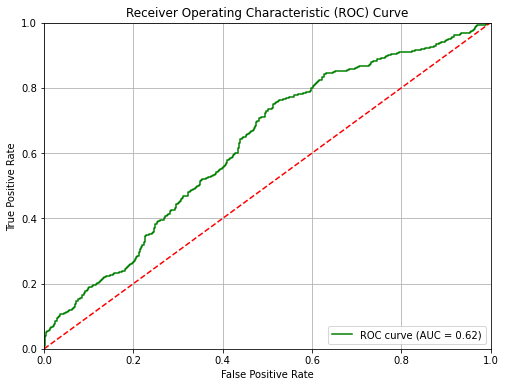

In [48]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()